

Nas células seguintes, vamos explorar diferentes visualizações para entender melhor os padrões e características dos nascimentos em Portugal.
    

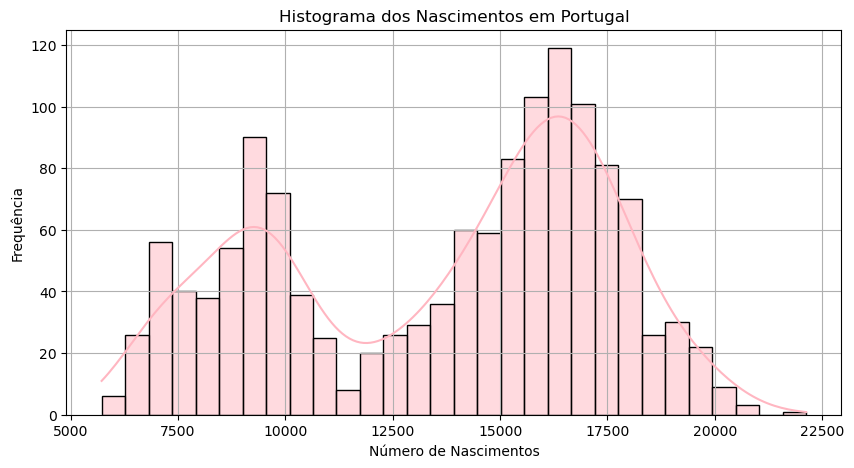

In [24]:
# Importar bibliotecas necessárias para visualização de dados
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o ficheiro CSV original num DataFrame
caminho_ficheiro = '../data/processed/births_PT_limpo.csv'
df = pd.read_csv(caminho_ficheiro)

plt.figure(figsize=(10, 5))
sns.histplot(df['Births'], bins=30, kde=True, color='#FFB6C1')
plt.title('Histograma dos Nascimentos em Portugal')
plt.xlabel('Número de Nascimentos')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()
    

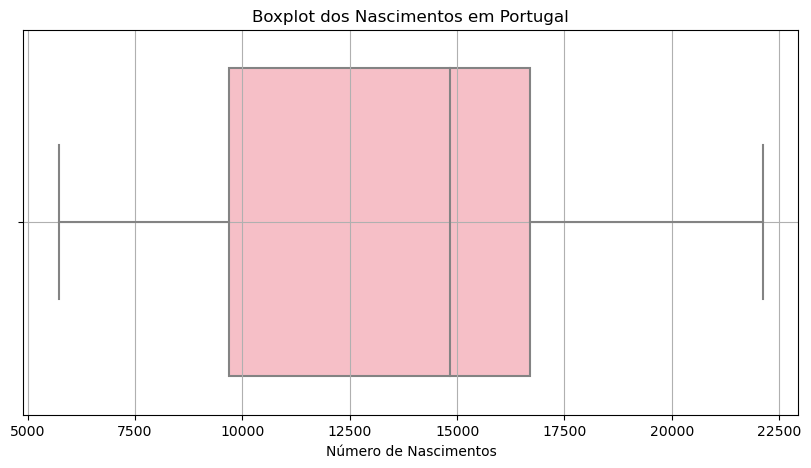

In [25]:

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Births'], color='#FFB6C1')
plt.title('Boxplot dos Nascimentos em Portugal')
plt.xlabel('Número de Nascimentos')
plt.grid(True)
plt.show()
    

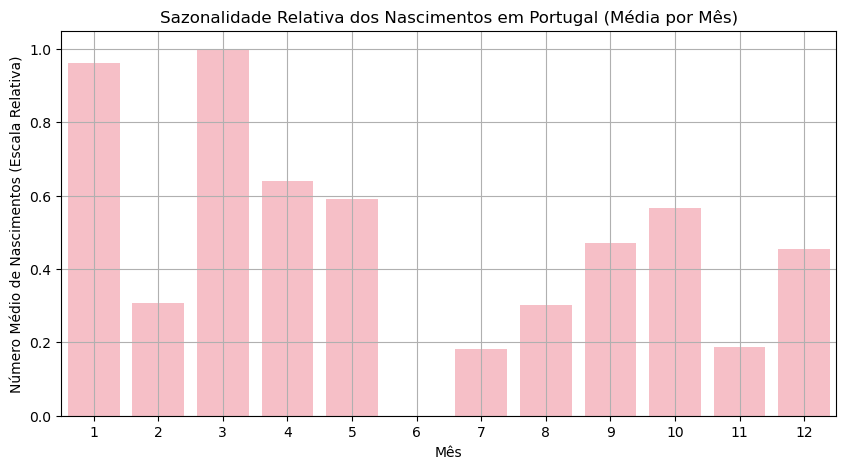

In [26]:
seasonality_df = df.copy()
seasonality_df['Date'] = pd.to_datetime(seasonality_df['Date'])
seasonality_df.set_index('Date', inplace=True)
seasonality_df['Month'] = seasonality_df.index.month
seasonal_plot_data = seasonality_df.groupby('Month')['Births'].mean()

min_val = seasonal_plot_data.min()
max_val = seasonal_plot_data.max()
relative_seasonal_plot_data = (seasonal_plot_data - min_val) / (max_val - min_val)

plt.figure(figsize=(10, 5))
sns.barplot(x=relative_seasonal_plot_data.index, y=relative_seasonal_plot_data.values, color='#FFB6C1')
plt.title('Sazonalidade Relativa dos Nascimentos em Portugal (Média por Mês)')
plt.xlabel('Mês')
plt.ylabel('Número Médio de Nascimentos (Escala Relativa)')
plt.grid(True)
plt.show()
    
    


Nesta célula, utilizamos a biblioteca `scipy.stats` para gerar um resumo de estatísticas descritivas.


In [27]:
from scipy import stats

resumo_stats = stats.describe(df['Births'])

# Exibir o resumo
print("Resumo de Estatísticas Descritivas:")
print("-------------------------------------------------------------")
print(f"Tamanho da amostra: {resumo_stats.nobs}")
print(f"Mínimo: {resumo_stats.minmax[0]}")
print(f"Máximo: {resumo_stats.minmax[1]}")
print(f"Média: {resumo_stats.mean:.4f}")
print(f"Variância: {resumo_stats.variance:.4f}")
print(f"Assimetria: {resumo_stats.skewness:.4f}")
print(f"Curtose: {resumo_stats.kurtosis:.4f}")


Resumo de Estatísticas Descritivas:
-------------------------------------------------------------
Tamanho da amostra: 1332
Mínimo: 5719
Máximo: 22127
Média: 13622.8213
Variância: 14749660.4759
Assimetria: -0.3505
Curtose: -1.2024
